# Allegeny County Markets

**In order to use the neccessary Pandas and GeoPandas features, we're going to need to import the following tools below.**

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

**Below we have a dataset from the Western PA Regional Data Center containing all the food facilities in Pittsburgh. I've shown the first five rows for an example of how the data looks.**

In [2]:
facilities = pd.read_csv("facilities.csv")
facilities.head(5)

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
0,10762,North Versailles VFD / South Wilmerding Social...,830,Sylvan Ave,North Versailles,PA,15137.0,North Versailles,250,Social Club-Bar Only,...,1969-01-01,NaN,60.0,NaN,NaN,1,1.0,-79.795408,40.389352,830 Sylvan Ave PA 15137
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,1984-06-17,NaN,35.0,NaN,NaN,7,NaN,-79.863828,40.428111,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,1984-06-17,NaN,41.0,NaN,NaN,7,1.0,-80.039348,40.390970,3113 W Liberty Ave PA 15216
3,10707,Hyd A Way Bar,NaN,Box 39,Morgan,PA,15064.0,South Fayette,201,Restaurant with Liquor,...,1987-03-01,NaN,30.0,NaN,NaN,7,NaN,NaN,NaN,Box 39 PA 15064
4,10711,Bratstvo Lodge #6 SNPJ,540,3rd Avenue,Bridgeville,PA,15017.0,Bridgeville,201,Restaurant with Liquor,...,1984-06-17,NaN,75.0,NaN,NaN,1,1.0,-80.135185,40.355935,540 3rd Avenue PA 15017


**Today all I care about is supermarkets, so I've created a query mask to extract just the relevant data to markets.**

In [3]:
query_mask = facilities['description'].str.contains("Supermarket")
markets = facilities[query_mask]
markets.head(5)

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
100,36779,Giant Eagle,666,Allegheny River Blvd,Oakmont,PA,15139.0,Oakmont,112,Chain Supermarket,...,1982-01-01,NaN,NaN,NaN,12000.0,7,NaN,-79.841497,40.521066,666 Allegheny River Blvd PA 15139
143,36753,Foodlane,3810,Main St,Homestead,PA,15120.0,Munhall,111,Supermarket,...,1982-01-01,NaN,NaN,NaN,2500.0,7,NaN,-79.904445,40.383475,3810 Main St PA 15120
155,36519,Kuhn's Market,661,Lincoln Ave,Pittsburgh,PA,15202.0,Bellevue,112,Chain Supermarket,...,1984-06-17,NaN,NaN,NaN,14976.0,1,1.0,-80.060283,40.497170,661 Lincoln Ave PA 15202
156,36498,Food Shoppe,5878,Northumberland Street,Pittsburgh,PA,15217.0,Pittsburgh-114,111,Supermarket,...,1983-05-05,NaN,8.0,NaN,1600.0,1,1.0,-79.920539,40.441569,5878 Northumberland Street PA 15217
209,38674,Amarraca,711,Browns Lane,Pittsburgh,PA,15237.0,Ross,111,Supermarket,...,1984-11-28,NaN,NaN,NaN,68000.0,7,NaN,-80.019467,40.546598,711 Browns Lane PA 15237


**We can look at how many supermarkets each municipality has with a dictionary, but that's not that visually pleasing. Plus, Allegeheny county has way too many municiplalities to fit on a small chart.**

In [4]:
marketsDict = {}
for index, rows in markets.iterrows():
    if rows.municipal not in marketsDict:
        marketsDict[rows.municipal] = 1
    else:
        marketsDict[rows.municipal] += 1
totalMarkets = pd.DataFrame.from_dict(marketsDict, orient = 'index')
print(totalMarkets)

                 0
Oakmont          1
Munhall          1
Bellevue         1
Pittsburgh-114   6
Ross            14
...             ..
Mt Lebanon       3
Upper St Clair   3
Pittsburgh-105   3
Hampton          1
Pittsburgh-106   1

[91 rows x 1 columns]


**Instead, we're going to plot the locations of the markets on a shape file of Pittsbugh that was provided by the lecture notes. I've shown the file below.**

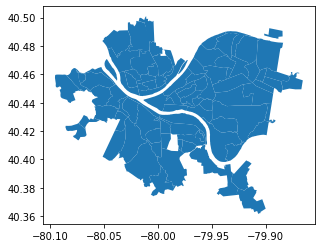

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

**In order to plot the locations onto the map, we're going to need to pull the longitudes and latitudes from our markets dataset, and superimpose them onto the map above.**

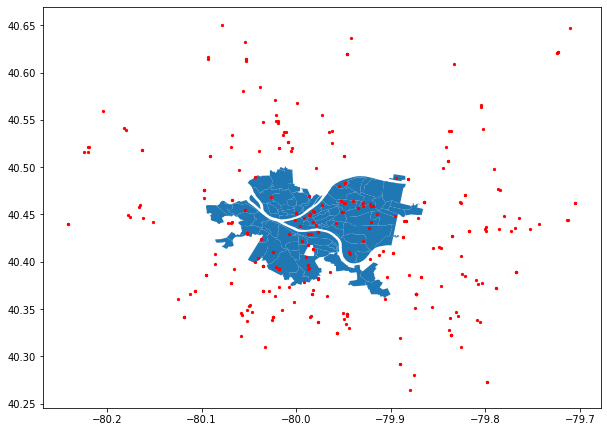

In [7]:
lo = markets['x']
lat = markets['y']
pittsburgh_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
fig,ax = plt.subplots(figsize = (10,10))
pittsburgh_map.plot(ax = ax)
geometry = [Point(xy) for xy in zip(lo,lat)]
geo_df = geopandas.GeoDataFrame(geometry = geometry)
g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '.',label = 'Pittsburgh')
plt.show()

**As you can see, Allegeheny county is WAY bigger than just Pittsburgh, so it may be smart to shrink the scope of our map a bit. That way we'll get a more precise map with much more relevant information**

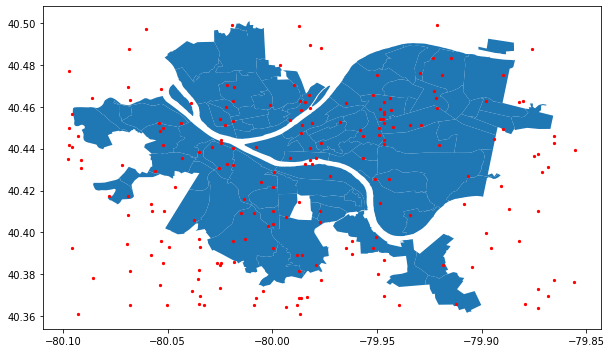

In [10]:
lo = markets[(markets.x < -79.85) & (markets.x > -80.10)]['x']
lat = markets[(markets.y < 40.5) & (markets.y > 40.36)]['y']
pittsburgh_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
fig,ax = plt.subplots(figsize = (10,10))
pittsburgh_map.plot(ax = ax)
geometry = [Point(xy) for xy in zip(lo,lat)]
geo_df = geopandas.GeoDataFrame(geometry = geometry)
g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '.',label = 'Pittsburgh')
plt.show()

**Now we have a map with only the supermarkts within a small driving distance of the city, which is much more valuable information for our study!**

**Based on this map, it appears that Shadyside and Squirrel Hill North are the most optimal location for proximity to markets. Brighton Heights and Perry North appear to be the farthest from supermakets, causing them to fall short in this particular metric. It is important to note that I'm giving Squirrel Hill South a pass, as the vast majority of it is made up of Schenely and Frick Park.**